## Transfer Learning VGG 19 using Keras

In [106]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [107]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Datasets/train'
valid_path = 'Datasets/Datasets/test'


In [108]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
from tensorflow.keras.applications.vgg19 import VGG19
resnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




AttributeError: 'str' object has no attribute 'decode'

In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
8/8 [==============================] - 18s 2s/step - loss: 1.2388 - accuracy: 0.5156 - val_loss: 0.7766 - val_accuracy: 0.5517
Epoch 2/10
8/8 [==============================] - 12s 1s/step - loss: 0.4497 - accuracy: 0.8125 - val_loss: 0.6047 - val_accuracy: 0.7414
Epoch 3/10
8/8 [==============================] - 12s 1s/step - loss: 0.2753 - accuracy: 0.8594 - val_loss: 0.7062 - val_accuracy: 0.7414
Epoch 4/10
8/8 [==============================] - 12s 1s/step - loss: 0.1545 - accuracy: 0.9375 - val_loss: 0.4395 - val_accuracy: 0.7759
Epoch 5/10
8/8 [==============================] - 12s 1s/step - loss: 0.0563 - accuracy: 1.0000 - val_loss: 0.4762 - val_accuracy: 0.8103
Epoch 6/10
8/8 [==============================] - 12s 1s/step - loss: 0.0859 - accuracy: 0.9688 - val_loss: 0.3466 - val_accuracy: 0.8966
Epoch 7/10
8/8 [==============================] - 12s 1s/step - loss: 0.0336 - accuracy: 1.0000 - val_loss: 0.4568 - val_accuracy: 0.8448
Epoch 8/10
8/8 [==================

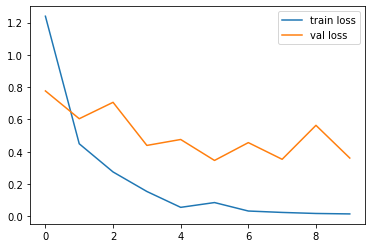

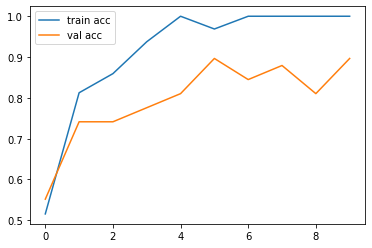

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [56]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('vgg19.h5')

In [73]:
y_pred = model.predict(test_set)

In [74]:
y_pred

array([[3.26893751e-05, 9.97794867e-01, 2.17238185e-03],
       [2.76024541e-04, 9.93213773e-01, 6.51022652e-03],
       [4.35442693e-04, 9.98661757e-01, 9.02809028e-04],
       [3.54007840e-01, 2.03010743e-03, 6.43962026e-01],
       [6.15429963e-05, 9.97044742e-01, 2.89365114e-03],
       [2.48371671e-05, 9.96869385e-01, 3.10577173e-03],
       [3.17730159e-01, 2.05269784e-01, 4.77000058e-01],
       [1.98270790e-02, 9.79090571e-01, 1.08229439e-03],
       [8.36418767e-05, 9.99839187e-01, 7.71579071e-05],
       [3.25218163e-04, 9.98929799e-01, 7.44982623e-04],
       [4.59152870e-02, 2.51085195e-03, 9.51573849e-01],
       [4.78177816e-02, 3.18412459e-03, 9.48998094e-01],
       [9.77666117e-03, 5.54694414e-01, 4.35528964e-01],
       [3.06046545e-03, 9.89225805e-01, 7.71374675e-03],
       [9.75089252e-01, 4.19352000e-04, 2.44913418e-02],
       [1.33587522e-02, 2.99277175e-02, 9.56713557e-01],
       [8.02460685e-03, 6.72493458e-01, 3.19481909e-01],
       [7.91185856e-01, 6.91068

In [75]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [76]:
y_pred

array([1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 0, 2, 1, 1, 1,
       0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 0, 2, 0, 1,
       1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 2, 1, 0], dtype=int64)

In [36]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [177]:
#predicting over own image
img=image.load_img('Datasets/Datasets/Test/mercedes/45.jpg',target_size=(224,224))

In [170]:
x=image.img_to_array(img)

array([[[ 81., 113., 124.],
        [ 81., 113., 124.],
        [ 81., 113., 124.],
        ...,
        [ 31.,  66.,  88.],
        [ 31.,  66.,  86.],
        [ 31.,  66.,  86.]],

       [[ 82., 114., 125.],
        [ 82., 114., 125.],
        [ 82., 114., 125.],
        ...,
        [ 32.,  67.,  89.],
        [ 32.,  67.,  87.],
        [ 32.,  67.,  87.]],

       [[ 84., 116., 127.],
        [ 84., 116., 127.],
        [ 84., 116., 127.],
        ...,
        [ 33.,  68.,  90.],
        [ 33.,  68.,  88.],
        [ 33.,  68.,  88.]],

       ...,

       [[ 59.,  64.,  68.],
        [121., 126., 130.],
        [133., 138., 142.],
        ...,
        [ 17.,  20.,  25.],
        [ 17.,  20.,  25.],
        [ 17.,  20.,  25.]],

       [[ 67.,  70.,  75.],
        [ 90.,  93.,  98.],
        [140., 143., 148.],
        ...,
        [ 19.,  22.,  27.],
        [ 19.,  22.,  27.],
        [ 20.,  23.,  28.]],

       [[ 67.,  70.,  75.],
        [ 90.,  93.,  98.],
        [139., 1

In [171]:
x.shape

(224, 224, 3)

In [172]:
x=x/255

In [173]:
x=np.expand_dims(x,axis=0)

In [174]:
model.predict(x)

array([[1.0000000e+00, 2.2966227e-38, 0.0000000e+00]], dtype=float32)

In [175]:
a=np.argmax(model.predict(x), axis=1)

In [176]:
a

array([2], dtype=int64)